In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")

# Quick overview
print(fraud_df.head())
print(fraud_df.info())
print(fraud_df.describe())
print("Dataset shape:", fraud_df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [36]:
# Check for missing values
fraud_df.isnull().sum()

# Remove duplicates
fraud_df.drop_duplicates(inplace=True)

# Convert data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['ip_address'] = fraud_df['ip_address'].astype(str)

# Confirm changes
fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  object        
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 12.7+ MB


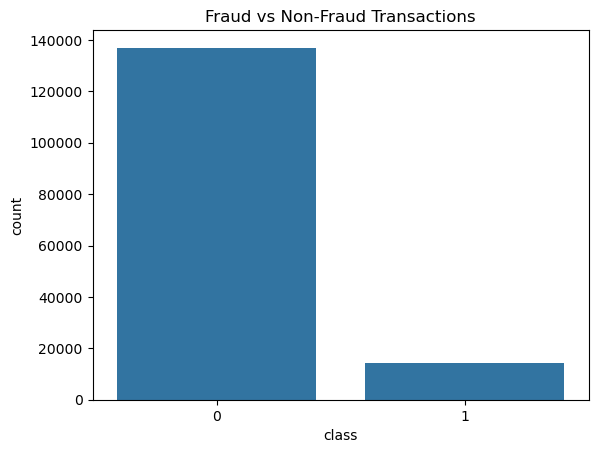

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

In [37]:
sns.countplot(x='class', data=fraud_df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Quantify imbalance
fraud_df['class'].value_counts(normalize=True)


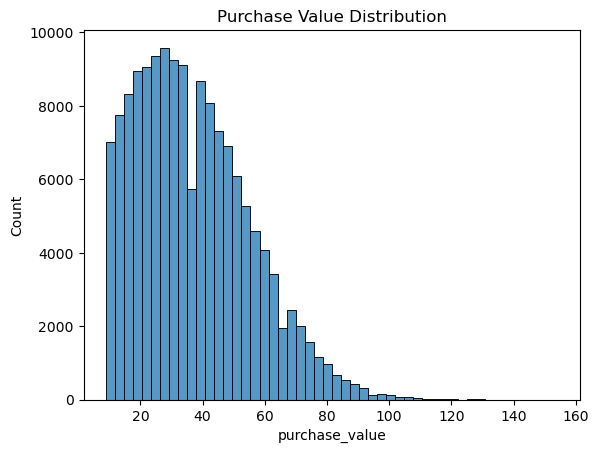

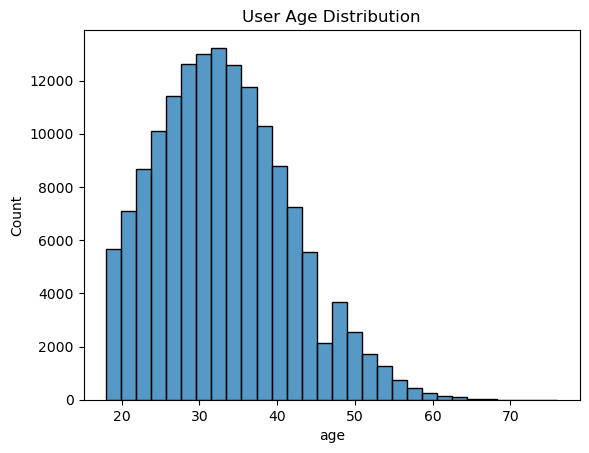

In [4]:
sns.histplot(fraud_df['purchase_value'], bins=50)
plt.title("Purchase Value Distribution")
plt.show()

sns.histplot(fraud_df['age'], bins=30)
plt.title("User Age Distribution")
plt.show()


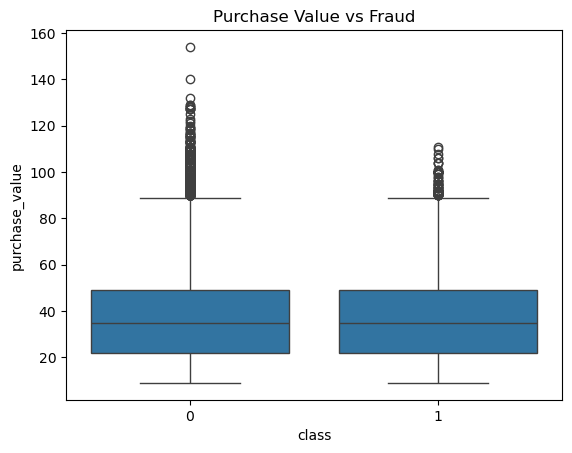

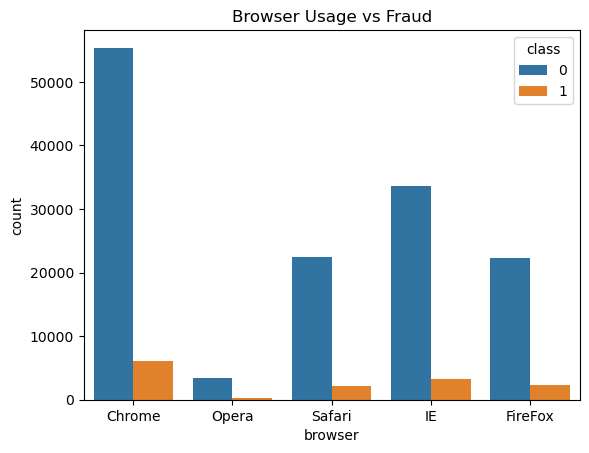

In [38]:
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()

sns.countplot(x='browser', hue='class', data=fraud_df)
plt.title("Browser Usage vs Fraud")
plt.show()


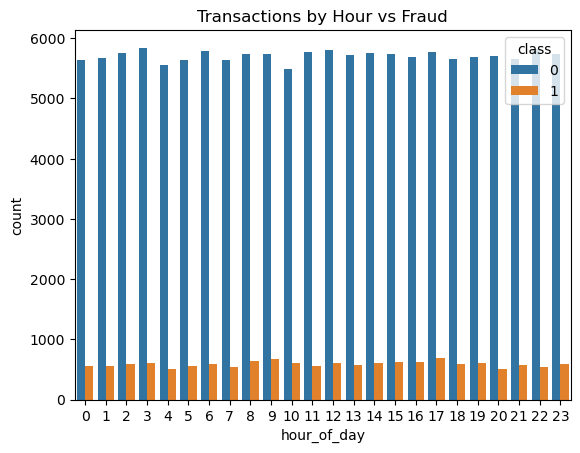

In [39]:
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.day_name()

sns.countplot(x='hour_of_day', hue='class', data=fraud_df)
plt.title("Transactions by Hour vs Fraud")
plt.show()


In [41]:
import ipaddress

def safe_ip_to_int(ip):
    try:
        return int(ipaddress.IPv4Address(ip))
    except Exception:
        return None  # or np.nan

fraud_df['ip_int'] = fraud_df['ip_address'].apply(safe_ip_to_int)
fraud_df[fraud_df['ip_int'].isna()]



,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,hour_of_day,day_of_week,ip_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,2,Saturday,None
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,1,Monday,None
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,18,Thursday,None
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,13,Monday,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,18,Wednesday,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1,0,Sunday,None
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0,12,Tuesday,None
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0,7,Wednesday,None
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0,9,Monday,None


In [42]:
# Convert float IP values to integers by truncating decimals
fraud_df['ip_int'] = fraud_df['ip_address'].apply(lambda x: int(float(x)))
fraud_df[['ip_address', 'ip_int']].head(10)



,ip_address,ip_int
0,732758368.79972,732758368
1,350311387.865908,350311387
2,2621473820.11095,2621473820
3,3840542443.91396,3840542443
4,415583117.452712,415583117
5,2809315199.92675,2809315199
6,3987484328.51882,3987484328
7,1692458727.64945,1692458727
8,3719094257.18731,3719094257
9,341674739.579911,341674739


In [25]:
import pandas as pd

# Convert IP ranges to integers
ip_country_df['lower_bound_ip_address'] = ip_country_df['lower_bound_ip_address'].astype(int)
ip_country_df['upper_bound_ip_address'] = ip_country_df['upper_bound_ip_address'].astype(int)

# Create IntervalIndex
ip_ranges = pd.IntervalIndex.from_arrays(
    ip_country_df['lower_bound_ip_address'],
    ip_country_df['upper_bound_ip_address'],
    closed='both'
)

# Safe mapping function
def get_country(ip):
    idx_array = ip_ranges.get_indexer_non_unique([ip])[0]
    # If no match, return None
    if len(idx_array) == 0 or idx_array[0] == -1:
        return None
    idx = idx_array[0]
    return ip_country_df.iloc[idx]['country']  # use iloc for integer position

# Apply to fraud_df
fraud_df['country'] = fraud_df['ip_int'].apply(get_country)

# Quick check
print(fraud_df[['ip_address', 'ip_int', 'country']].head(10))


         ip_address      ip_int        country
0   732758368.79972   732758368          Japan
1  350311387.865908   350311387  United States
2  2621473820.11095  2621473820           None
3  3840542443.91396  3840542443           None
4  415583117.452712   415583117  United States
5  2809315199.92675  2809315199           None
6  3987484328.51882  3987484328           None
7  1692458727.64945  1692458727  United States
8  3719094257.18731  3719094257           None
9  341674739.579911   341674739  United States


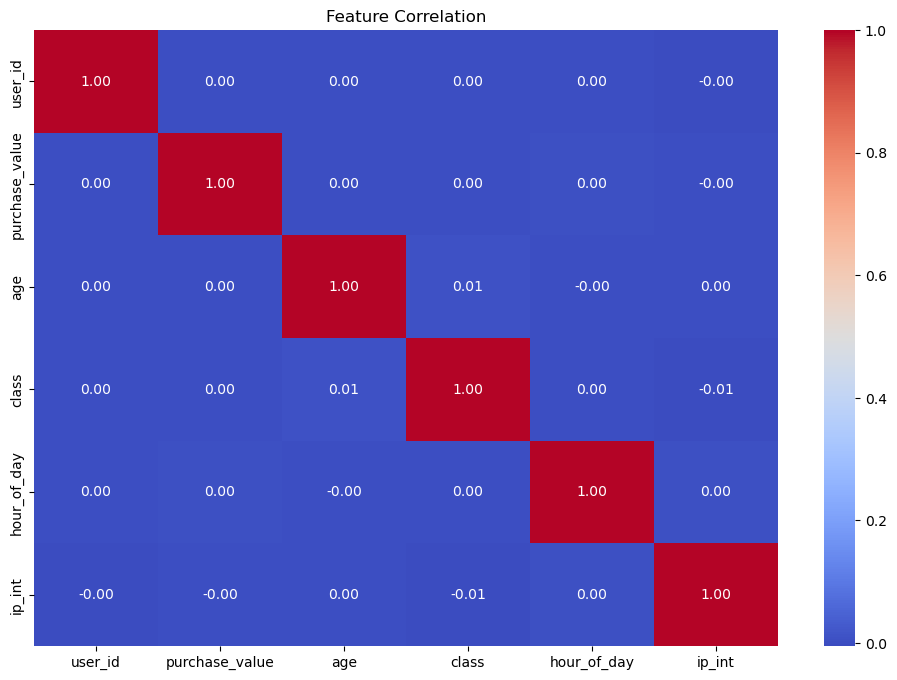

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_cols = fraud_df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [50]:
print("\nKey Observations:")
print("- The dataset is imbalanced: fraud cases are much less frequent than non-fraud.")
print("- Higher purchase values seem to have higher variance in fraud transactions.")
print("- Certain browsers appear more commonly in fraudulent transactions.")
print("- IP-based geolocation shows most transactions come from a few countries, with some countries showing higher fraud rates.")
print("- Numeric features like 'purchase_value', 'age', and 'ip_int' show moderate correlations but no extremely strong linear relationships.")



Key Observations:
- The dataset is imbalanced: fraud cases are much less frequent than non-fraud.
- Higher purchase values seem to have higher variance in fraud transactions.
- Certain browsers appear more commonly in fraudulent transactions.
- IP-based geolocation shows most transactions come from a few countries, with some countries showing higher fraud rates.
- Numeric features like 'purchase_value', 'age', and 'ip_int' show moderate correlations but no extremely strong linear relationships.
